## Who is Our NBA Champion? Predicting NBA Results in a Non-Covid World Using MCMC Chains
#### MATH 341: Statistical Inference
#### Ryan Duchemin and Tomas Meade

In [2]:
import pandas as pd
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nba = pd.read_csv('nba_games_by_team.csv')
print(nba.to_latex(index = True, multirow = True)) 

\begin{tabular}{llllrrrr}
\toprule
{} &                    Team &                     Opp & WorL &  TeamPTS &  OppPTS &   W &   L \\
\midrule
0    &         Toronto Raptors &    New Orleans Pelicans &    W &      130 &     122 &   1 &   0 \\
1    &         Toronto Raptors &          Boston Celtics &    L &      106 &     112 &   1 &   1 \\
2    &         Toronto Raptors &           Chicago Bulls &    W &      108 &      84 &   2 &   1 \\
3    &         Toronto Raptors &           Orlando Magic &    W &      104 &      95 &   3 &   1 \\
4    &         Toronto Raptors &         Detroit Pistons &    W &      125 &     113 &   4 &   1 \\
5    &         Toronto Raptors &         Milwaukee Bucks &    L &      105 &     115 &   4 &   2 \\
6    &         Toronto Raptors &        Sacramento Kings &    W &      124 &     120 &   5 &   2 \\
7    &         Toronto Raptors &    New Orleans Pelicans &    W &      122 &     104 &   6 &   2 \\
8    &         Toronto Raptors &      Los Angeles Lakers &

In [4]:
## This code is used to simp;lify the long string names of teams to their 3 letter acronyms
nba['Team'] = nba['Team'].replace(['Atlanta Hawks','Boston Celtics','Brooklyn Nets','Charlotte Hornets','Chicago Bulls', 
                                   'Cleveland Cavaliers','Dallas Mavericks','Denver Nuggets','Detroit Pistons',
                                   'Golden State Warriors','Houston Rockets','Indiana Pacers','Los Angeles Clippers',
                                   'Los Angeles Lakers','Memphis Grizzlies','Miami Heat','Milwaukee Bucks',
                                   'Minnesota Timberwolves','New Orleans Pelicans','New York Knicks',
                                   'Oklahoma City Thunder','Orlando Magic','Philadelphia 76ers','Phoenix Suns',
                                   'Portland Trail Blazers','Sacramento Kings','San Antonio Spurs','Toronto Raptors',
                                   'Utah Jazz','Washington Wizards'],
                                  ['ATL','BOS','BKN','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC',
                                   'LAL','MEM','MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHX','POR','SAC',
                                   'SAS','TOR','UTA','WAS'])
nba['Opp'] = nba['Opp'].replace(['Atlanta Hawks','Boston Celtics','Brooklyn Nets','Charlotte Hornets','Chicago Bulls', 
                                   'Cleveland Cavaliers','Dallas Mavericks','Denver Nuggets','Detroit Pistons',
                                   'Golden State Warriors','Houston Rockets','Indiana Pacers','Los Angeles Clippers',
                                   'Los Angeles Lakers','Memphis Grizzlies','Miami Heat','Milwaukee Bucks',
                                   'Minnesota Timberwolves','New Orleans Pelicans','New York Knicks',
                                   'Oklahoma City Thunder','Orlando Magic','Philadelphia 76ers','Phoenix Suns',
                                   'Portland Trail Blazers','Sacramento Kings','San Antonio Spurs','Toronto Raptors',
                                   'Utah Jazz','Washington Wizards'],
                                  ['ATL','BOS','BKN','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC',
                                   'LAL','MEM','MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHX','POR','SAC',
                                   'SAS','TOR','UTA','WAS'])
nba.head()

,Team,Opp,WorL,TeamPTS,OppPTS,W,L
0,TOR,NOP,W,130,122,1,0
1,TOR,BOS,L,106,112,1,1
2,TOR,CHI,W,108,84,2,1
3,TOR,ORL,W,104,95,3,1
4,TOR,DET,W,125,113,4,1


In [5]:
## This code is to create team specific dataframes
ATLdf = nba[nba.Team == 'ATL']
BOSdf = nba[nba.Team == 'BOS']
BKNdf = nba[nba.Team == 'BKN']
CHAdf = nba[nba.Team == 'CHA']
CHIdf = nba[nba.Team == 'CHI']
CLEdf = nba[nba.Team == 'CLE']
DALdf = nba[nba.Team == 'DAL']
DENdf = nba[nba.Team == 'DEN']
DETdf = nba[nba.Team == 'DET']
GSWdf = nba[nba.Team == 'GSW']
HOUdf = nba[nba.Team == 'HOU']
INDdf = nba[nba.Team == 'IND']
LACdf = nba[nba.Team == 'LAC']
LALdf = nba[nba.Team == 'LAL']
MEMdf = nba[nba.Team == 'MEM']
MIAdf = nba[nba.Team == 'MIA']
MILdf = nba[nba.Team == 'MIL']
MINdf = nba[nba.Team == 'MIN']
NOPdf = nba[nba.Team == 'NOP']
NYKdf = nba[nba.Team == 'NYK']
OKCdf = nba[nba.Team == 'OKC']
ORLdf = nba[nba.Team == 'ORL']
PHIdf = nba[nba.Team == 'PHI']
PHXdf = nba[nba.Team == 'PHX']
PORdf = nba[nba.Team == 'POR']
SACdf = nba[nba.Team == 'SAC']
SASdf = nba[nba.Team == 'SAS']
TORdf = nba[nba.Team == 'TOR']
UTAdf = nba[nba.Team == 'UTA']
WASdf = nba[nba.Team == 'WAS']

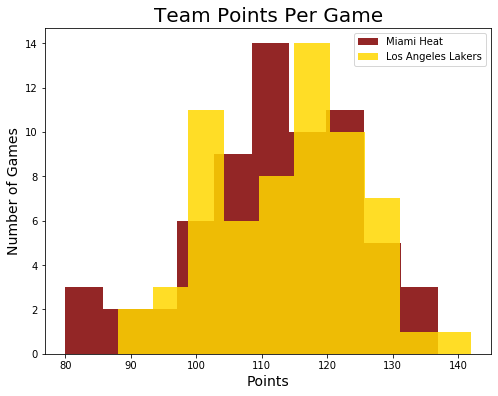

In [5]:
## This visualizes a team by team comparison for PPG
plt.figure(figsize=(8,6))
plt.hist(MIAdf.TeamPTS, label="Miami Heat", color="maroon", alpha=0.85)
plt.hist(LALdf.TeamPTS, label="Los Angeles Lakers", color="gold", alpha=0.85)
plt.xlabel("Points", size=14)
plt.ylabel("Number of Games", size=14)
plt.title("Team Points Per Game", size=20)
plt.legend(loc='upper right')
plt.savefig("MIA_LAL_PPG_hist.png")

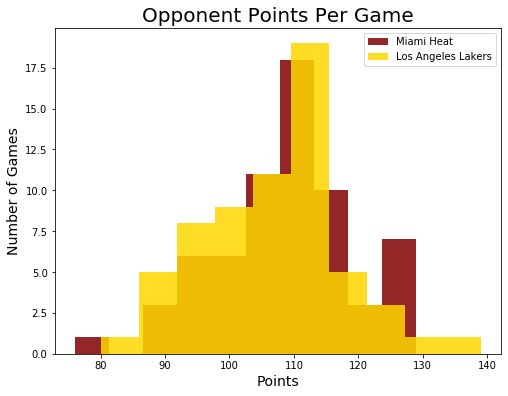

In [6]:
## THis plot visualizes a relationship for Opponent PPG
plt.figure(figsize=(8,6))
plt.hist(MIAdf.OppPTS, label="Miami Heat", color="maroon", alpha=0.85)
plt.hist(LALdf.OppPTS, label="Los Angeles Lakers", color="gold", alpha=0.85)
plt.xlabel("Points", size=14)
plt.ylabel("Number of Games", size=14)
plt.title("Opponent Points Per Game", size=20)
plt.legend(loc='upper right')
plt.savefig("MIA_LAL_OppPPG_hist.png")

In [6]:
## This code runs a single game simulation based on the team's points and opponent's points using
## overall mean and standard deviation. It incorporates both the points for and allowed. It pulls from a normal
## distribution since we assumed both variables were normal.
def gameSim(Team1df, Team2df):
        #Averages the random sample of a teams points with a random sample of the number of points the opponent allows
        T1 = (rnd.gauss(Team1df.TeamPTS.mean(),Team1df.TeamPTS.std())+ rnd.gauss(Team2df.OppPTS.mean(),Team2df.OppPTS.std()))/2
        T2 = (rnd.gauss(Team2df.TeamPTS.mean(),Team2df.TeamPTS.std())+ rnd.gauss(Team1df.OppPTS.mean(),Team1df.OppPTS.std()))/2
        ## This determines who "Won" the game.
        if int(round(T1)) > int(round(T2)):
            return 1
        elif int(round(T1)) < int(round(T2)):
            return -1
        else: return 0

In [7]:
## This code is used to simulate the games a certain number of times. It allows for the data to tend to the
## true population percentage by sampling more than a single time.
def gamesSim(Team1df,Team2df,number_simulations):
        gamesout = []
        team1win = 0
        team2win = 0
        tie = 0
        for i in range(number_simulations):
            #calls the previous game simulator and aggregates results
            gm = gameSim(Team1df, Team2df)
            gamesout.append(gm)
            if gm == 1:
                team1win +=1 
            elif gm == -1:
                team2win +=1
        ## We then output which team won at a greater percentage and then show the distribution of wins.
        if team1win > team2win:
            print("Team 1 wins!")
        else:
            print("Team 2 wins!")
        print(team1win/(team1win+team2win+tie))
        print(team2win/(team1win+team2win+tie))
        
        
    

In [8]:
##Trial Run to check the code is working.
gamesSim(MILdf, NYKdf, 10000)

Team 1 wins!
0.7541017227235439
0.2458982772764561


In [21]:
##Trial run to make sure the other case runs.
gamesSim(MIAdf, LALdf, 10000)

Team 2 wins!
0.4282613189993798
0.5717386810006202


## Now we will reference the remaining_nba_games.xlsx file to run the gamesSim on each team to then compile a complete record. The excel file will then be updated with a correct NBA record for 82 games for all 30 teams. Since this is random in nature, if the file is replicated, results may vary slightly.
### Atlanta Hawks

In [25]:
gamesSim(ATLdf, CLEdf, 10000)
gamesSim(ATLdf, NOPdf, 10000)
gamesSim(ATLdf, OKCdf, 10000)
gamesSim(ATLdf, WASdf, 10000)
gamesSim(ATLdf, PHIdf, 10000)
gamesSim(ATLdf, GSWdf, 10000)
gamesSim(ATLdf, SACdf, 10000)
gamesSim(ATLdf, UTAdf, 10000)
gamesSim(ATLdf, NOPdf, 10000)
gamesSim(ATLdf, CHAdf, 10000)
gamesSim(ATLdf, CHAdf, 10000)
gamesSim(ATLdf, DETdf, 10000)
gamesSim(ATLdf, TORdf, 10000)
gamesSim(ATLdf, MILdf, 10000)
gamesSim(ATLdf, CLEdf, 10000)

Team 2 wins!
0.49511768938225925
0.5048823106177408
Team 2 wins!
0.37879880498609253
0.6212011950139075
Team 2 wins!
0.3420104949068834
0.6579895050931166
Team 2 wins!
0.44615542552099374
0.5538445744790063
Team 2 wins!
0.3424629324546952
0.6575370675453048
Team 1 wins!
0.5159130703471007
0.48408692965289934
Team 2 wins!
0.40165033522434246
0.5983496647756575
Team 2 wins!
0.3228265348166461
0.677173465183354
Team 2 wins!
0.3917995444191344
0.6082004555808656
Team 2 wins!
0.48262032085561496
0.517379679144385
Team 2 wins!
0.4779335945555785
0.5220664054444215
Team 2 wins!
0.4322567330512847
0.5677432669487154
Team 2 wins!
0.28080288214101906
0.719197117858981
Team 2 wins!
0.21885556351724844
0.7811444364827516
Team 1 wins!
0.5013410356921807
0.49865896430781925


In [23]:
ATLdf.W.max()

20

In [24]:
## This updates the win total for the Atlanta Hawks.
ATL_final_W = ATLdf.W.max() + 2
ATL_final_W

22

We must not repeat this process for the other 29 NBA teams.

### Boston Celtics

In [19]:
gamesSim(BOSdf, MILdf, 10000)
gamesSim(BOSdf, WASdf, 10000)
gamesSim(BOSdf, CHIdf, 10000)
gamesSim(BOSdf, NYKdf, 10000)
gamesSim(BOSdf, TORdf, 10000)
gamesSim(BOSdf, BKNdf, 10000)
gamesSim(BOSdf, WASdf, 10000)
gamesSim(BOSdf, MEMdf, 10000)
gamesSim(BOSdf, PORdf, 10000)
gamesSim(BOSdf, MINdf, 10000)
gamesSim(BOSdf, MIAdf, 10000)
gamesSim(BOSdf, ORLdf, 10000)
gamesSim(BOSdf, MILdf, 10000)
gamesSim(BOSdf, INDdf, 10000)
gamesSim(BOSdf, ORLdf, 10000)
gamesSim(BOSdf, MIAdf, 10000)
gamesSim(BOSdf, DETdf, 10000)
gamesSim(BOSdf, CHIdf, 10000)

Team 2 wins!
0.409579971032485
0.590420028967515
Team 1 wins!
0.6677679124509601
0.3322320875490399
Team 1 wins!
0.6649777685864957
0.3350222314135043
Team 1 wins!
0.7036616812790099
0.2963383187209902
Team 2 wins!
0.49248626800704737
0.5075137319929527
Team 1 wins!
0.6336264873254009
0.36637351267459906
Team 1 wins!
0.6597165160230074
0.3402834839769926
Team 1 wins!
0.6239793281653747
0.37602067183462534
Team 1 wins!
0.6412087343475111
0.35879126565248887
Team 1 wins!
0.6892754219843557
0.3107245780156443
Team 1 wins!
0.5441085110788983
0.45589148892110165
Team 1 wins!
0.6191263038314572
0.38087369616854283
Team 2 wins!
0.41366420932405773
0.5863357906759422
Team 1 wins!
0.5782870178349233
0.42171298216507674
Team 1 wins!
0.6170146463072609
0.38298535369273917
Team 1 wins!
0.547069825436409
0.452930174563591
Team 1 wins!
0.6713387612078738
0.32866123879212616
Team 1 wins!
0.6721498034347196
0.32785019656528036


In [20]:
BOSdf.W.max()

43

In [21]:
BOSdf.L.max()

21

In [22]:
BOS_final_W = BOSdf.W.max() + 15
BOS_final_W

58

### Brooklyn Nets

In [23]:
gamesSim(BKNdf, GSWdf, 10000)
gamesSim(BKNdf, LACdf, 10000)
gamesSim(BKNdf, SACdf, 10000)
gamesSim(BKNdf, WASdf, 10000)
gamesSim(BKNdf, BOSdf, 10000)
gamesSim(BKNdf, ORLdf, 10000)
gamesSim(BKNdf, LACdf, 10000)
gamesSim(BKNdf, ORLdf, 10000)
gamesSim(BKNdf, CLEdf, 10000)
gamesSim(BKNdf, PORdf, 10000)
gamesSim(BKNdf, DETdf, 10000)
gamesSim(BKNdf, INDdf, 10000)
gamesSim(BKNdf, DALdf, 10000)
gamesSim(BKNdf, OKCdf, 10000)
gamesSim(BKNdf, MILdf, 10000)
gamesSim(BKNdf, CHIdf, 10000)
gamesSim(BKNdf, CLEdf, 10000)
gamesSim(BKNdf, MILdf, 10000)

Team 1 wins!
0.6366917603382489
0.3633082396617511
Team 2 wins!
0.38976581037862373
0.6102341896213762
Team 1 wins!
0.5224654975614818
0.4775345024385182
Team 1 wins!
0.5482002482416218
0.45179975175837817
Team 2 wins!
0.3767995857068876
0.6232004142931123
Team 1 wins!
0.5083221337744237
0.49167786622557635
Team 2 wins!
0.3857260726072607
0.6142739273927392
Team 1 wins!
0.5072162807600457
0.4927837192399543
Team 1 wins!
0.6227352728025676
0.3772647271974324
Team 1 wins!
0.5155022736668045
0.48449772633319554
Team 1 wins!
0.5515214027849407
0.4484785972150593
Team 2 wins!
0.45277749043136445
0.5472225095686356
Team 2 wins!
0.38484628920401615
0.6151537107959838
Team 2 wins!
0.4433267655293996
0.5566732344706005
Team 2 wins!
0.3
0.7
Team 1 wins!
0.5466141242351965
0.4533858757648035
Team 1 wins!
0.6123966942148761
0.387603305785124
Team 2 wins!
0.30655805320684676
0.6934419467931532


In [80]:
BKN_final_W = BKNdf.W.max() + 10
BKN_final_W

40

### Charlotte Hornets

In [25]:
gamesSim(CHAdf, CLEdf, 10000)
gamesSim(CHAdf, ORLdf, 10000)
gamesSim(CHAdf, NYKdf, 10000)
gamesSim(CHAdf, PHIdf, 10000)
gamesSim(CHAdf, LALdf, 10000)
gamesSim(CHAdf, PORdf, 10000)
gamesSim(CHAdf, OKCdf, 10000)
gamesSim(CHAdf, LACdf, 10000)
gamesSim(CHAdf, MIAdf, 10000)
gamesSim(CHAdf, ORLdf, 10000)
gamesSim(CHAdf, ATLdf, 10000)
gamesSim(CHAdf, ATLdf, 10000)
gamesSim(CHAdf, NOPdf, 10000)
gamesSim(CHAdf, TORdf, 10000)
gamesSim(CHAdf, WASdf, 10000)
gamesSim(CHAdf, MIAdf, 10000)
gamesSim(CHAdf, PHIdf, 10000)

Team 1 wins!
0.5169072164948454
0.48309278350515467
Team 2 wins!
0.3952912019826518
0.6047087980173482
Team 1 wins!
0.5011859337939569
0.4988140662060431
Team 2 wins!
0.3497613612782735
0.6502386387217265
Team 2 wins!
0.2652223020844029
0.7347776979155971
Team 2 wins!
0.4069273047806699
0.59307269521933
Team 2 wins!
0.35141825683341926
0.6485817431665807
Team 2 wins!
0.30362832768013154
0.6963716723198684
Team 2 wins!
0.3330927090852841
0.6669072909147159
Team 2 wins!
0.4007842327933134
0.5992157672066866
Team 1 wins!
0.5169815216269227
0.4830184783730773
Team 1 wins!
0.525816757703803
0.47418324229619707
Team 2 wins!
0.39495711480830836
0.6050428851916917
Team 2 wins!
0.285552232649273
0.714447767350727
Team 2 wins!
0.45555210597123047
0.5444478940287696
Team 2 wins!
0.3266274631177138
0.6733725368822862
Team 2 wins!
0.34779008384225235
0.6522099161577476


In [81]:
CHA_final_W = CHAdf.W.max() + 4
CHA_final_W

27

### Chicago Bulls

In [27]:
gamesSim(CHIdf, ORLdf, 10000)
gamesSim(CHIdf, MIAdf, 10000)
gamesSim(CHIdf, BOSdf, 10000)
gamesSim(CHIdf, MIAdf, 10000)
gamesSim(CHIdf, SASdf, 10000)
gamesSim(CHIdf, HOUdf, 10000)
gamesSim(CHIdf, DENdf, 10000)
gamesSim(CHIdf, PHIdf, 10000)
gamesSim(CHIdf, NYKdf, 10000)
gamesSim(CHIdf, UTAdf, 10000)
gamesSim(CHIdf, DENdf, 10000)
gamesSim(CHIdf, PHXdf, 10000)
gamesSim(CHIdf, LACdf, 10000)
gamesSim(CHIdf, LALdf, 10000)
gamesSim(CHIdf, BKNdf, 10000)
gamesSim(CHIdf, ORLdf, 10000)
gamesSim(CHIdf, BOSdf, 10000)

Team 2 wins!
0.4672800578931045
0.5327199421068954
Team 2 wins!
0.38311351126804444
0.6168864887319555
Team 2 wins!
0.3275311566587702
0.6724688433412298
Team 2 wins!
0.38220330183781537
0.6177966981621846
Team 2 wins!
0.47260987294313683
0.5273901270568632
Team 2 wins!
0.3720521307405875
0.6279478692594125
Team 2 wins!
0.3933188540697073
0.6066811459302927
Team 2 wins!
0.403207449560269
0.596792550439731
Team 1 wins!
0.5592118836393646
0.4407881163606354
Team 2 wins!
0.3875454073689673
0.6124545926310327
Team 2 wins!
0.3892686969131966
0.6107313030868033
Team 2 wins!
0.47275757891447023
0.5272424210855298
Team 2 wins!
0.34687564446277586
0.6531243555372241
Team 2 wins!
0.31631176348976636
0.6836882365102336
Team 2 wins!
0.45696869511313154
0.5430313048868685
Team 2 wins!
0.4763926278732657
0.5236073721267344
Team 2 wins!
0.3293691830403309
0.6706308169596691


In [28]:
CHI_final_W = CHIdf.W.max() + 1
CHI_final_W

23

### Cleveland Cavaliers

In [29]:
gamesSim(CLEdf, CHAdf, 10000)
gamesSim(CLEdf, ATLdf, 10000)
gamesSim(CLEdf, HOUdf, 10000)
gamesSim(CLEdf, ORLdf, 10000)
gamesSim(CLEdf, INDdf, 10000)
gamesSim(CLEdf, SACdf, 10000)
gamesSim(CLEdf, LALdf, 10000)
gamesSim(CLEdf, BKNdf, 10000)
gamesSim(CLEdf, PHXdf, 10000)
gamesSim(CLEdf, UTAdf, 10000)
gamesSim(CLEdf, PHXdf, 10000)
gamesSim(CLEdf, SACdf, 10000)
gamesSim(CLEdf, PORdf, 10000)
gamesSim(CLEdf, GSWdf, 10000)
gamesSim(CLEdf, MILdf, 10000)
gamesSim(CLEdf, BKNdf, 10000)
gamesSim(CLEdf, ATLdf, 10000)

Team 2 wins!
0.4811850311850312
0.5188149688149688
Team 1 wins!
0.5017642175176422
0.49823578248235784
Team 2 wins!
0.3005875682919287
0.6994124317080713
Team 2 wins!
0.39256582343830665
0.6074341765616933
Team 2 wins!
0.33088463528194517
0.6691153647180549
Team 2 wins!
0.39420981633288366
0.6057901836671163
Team 2 wins!
0.2452578693735261
0.7547421306264739
Team 2 wins!
0.3727047658345368
0.6272952341654632
Team 2 wins!
0.3842659508569069
0.6157340491430932
Team 2 wins!
0.30607621009268793
0.6939237899073121
Team 2 wins!
0.38663632602399667
0.6133636739760033
Team 2 wins!
0.39563056533443774
0.6043694346655623
Team 2 wins!
0.38920601971977165
0.6107939802802284
Team 1 wins!
0.5214914552045572
0.4785085447954428
Team 2 wins!
0.20090247154138038
0.7990975284586196
Team 2 wins!
0.38782482658660317
0.6121751734133968
Team 2 wins!
0.4976796947509539
0.5023203052490461


In [82]:
CLE_final_W = CLEdf.W.max() + 2
CLE_final_W

21

### Dallas Mavericks

In [31]:
gamesSim(DALdf, PHXdf, 10000)
gamesSim(DALdf, LACdf, 10000)
gamesSim(DALdf, SACdf, 10000)
gamesSim(DALdf, PORdf, 10000)
gamesSim(DALdf, PHXdf, 10000)
gamesSim(DALdf, HOUdf, 10000)
gamesSim(DALdf, UTAdf, 10000)
gamesSim(DALdf, MILdf, 10000)
gamesSim(DALdf, MINdf, 10000)
gamesSim(DALdf, MEMdf, 10000)
gamesSim(DALdf, BKNdf, 10000)
gamesSim(DALdf, HOUdf, 10000)
gamesSim(DALdf, DETdf, 10000)
gamesSim(DALdf, DENdf, 10000)
gamesSim(DALdf, OKCdf, 10000)

Team 1 wins!
0.642679643818596
0.357320356181404
Team 2 wins!
0.4924109447599381
0.5075890552400619
Team 1 wins!
0.6454884105960265
0.35451158940397354
Team 1 wins!
0.645643153526971
0.35435684647302906
Team 1 wins!
0.6304235269752511
0.3695764730247489
Team 1 wins!
0.5420211662170574
0.4579788337829425
Team 1 wins!
0.5589759535655058
0.4410240464344942
Team 2 wins!
0.41473749483257544
0.5852625051674245
Team 1 wins!
0.6871525633106856
0.3128474366893144
Team 1 wins!
0.6246246246246246
0.37537537537537535
Team 1 wins!
0.6230832987981766
0.37691670120182347
Team 1 wins!
0.5484870391407621
0.45151296085923787
Team 1 wins!
0.6743801652892562
0.3256198347107438
Team 1 wins!
0.5534141539736814
0.4465858460263185
Team 1 wins!
0.5754033926354986
0.42459660736450144


In [32]:
DAL_final_W = DALdf.W.max() + 13
DAL_final_W

53

### Denver Nuggets

In [33]:
gamesSim(DENdf, SASdf, 10000)
gamesSim(DENdf, LALdf, 10000)
gamesSim(DENdf, LACdf, 10000)
gamesSim(DENdf, OKCdf, 10000)
gamesSim(DENdf, TORdf, 10000)
gamesSim(DENdf, CHIdf, 10000)
gamesSim(DENdf, MIAdf, 10000)
gamesSim(DENdf, SASdf, 10000)
gamesSim(DENdf, OKCdf, 10000)
gamesSim(DENdf, GSWdf, 10000)
gamesSim(DENdf, CHIdf, 10000)
gamesSim(DENdf, UTAdf, 10000)
gamesSim(DENdf, MEMdf, 10000)
gamesSim(DENdf, PORdf, 10000)
gamesSim(DENdf, SACdf, 10000)
gamesSim(DENdf, DALdf, 10000)
gamesSim(DENdf, UTAdf, 10000)

Team 1 wins!
0.5923323344011574
0.4076676655988426
Team 2 wins!
0.42252354828692684
0.5774764517130732
Team 2 wins!
0.44921109621532435
0.5507889037846757
Team 1 wins!
0.5143951946975973
0.48560480530240263
Team 2 wins!
0.4283937823834197
0.5716062176165803
Team 1 wins!
0.6113812726332126
0.3886187273667874
Team 1 wins!
0.5016093863565569
0.49839061364344306
Team 1 wins!
0.5898153909977183
0.4101846090022817
Team 1 wins!
0.5057983019258646
0.49420169807413544
Team 1 wins!
0.6933416046319272
0.30665839536807277
Team 1 wins!
0.6158524015666873
0.3841475984333127
Team 2 wins!
0.49254349627174815
0.5074565037282519
Team 1 wins!
0.5767995857068876
0.4232004142931124
Team 1 wins!
0.5913566172660379
0.40864338273396206
Team 1 wins!
0.5864178330741316
0.4135821669258683
Team 2 wins!
0.4449393970786284
0.5550606029213716
Team 2 wins!
0.49176080422841745
0.5082391957715825


In [83]:
DEN_final_W = DENdf.W.max() + 11
DEN_final_W

54

### Detroit Pistons

In [35]:
gamesSim(DETdf, TORdf, 10000)
gamesSim(DETdf, ORLdf, 10000)
gamesSim(DETdf, GSWdf, 10000)
gamesSim(DETdf, LALdf, 10000)
gamesSim(DETdf, MILdf, 10000)
gamesSim(DETdf, PORdf, 10000)
gamesSim(DETdf, LACdf, 10000)
gamesSim(DETdf, HOUdf, 10000)
gamesSim(DETdf, BKNdf, 10000)
gamesSim(DETdf, MIAdf, 10000)
gamesSim(DETdf, MINdf, 10000)
gamesSim(DETdf, ATLdf, 10000)
gamesSim(DETdf, MIAdf, 10000)
gamesSim(DETdf, DALdf, 10000)
gamesSim(DETdf, BOSdf, 10000)
gamesSim(DETdf, NYKdf, 10000)

Team 2 wins!
0.32229785478547857
0.6777021452145214
Team 2 wins!
0.44346655622282044
0.5565334437771795
Team 1 wins!
0.5889900662251656
0.4110099337748344
Team 2 wins!
0.3081449365128523
0.6918550634871478
Team 2 wins!
0.26180169037311896
0.738198309626881
Team 2 wins!
0.4613385990438578
0.5386614009561421
Team 2 wins!
0.34754906998253005
0.6524509300174699
Team 2 wins!
0.37144930541156956
0.6285506945884305
Team 2 wins!
0.45864037363777893
0.541359626362221
Team 2 wins!
0.38720364426959314
0.6127963557304069
Team 1 wins!
0.5170060994520831
0.48299390054791685
Team 1 wins!
0.5736706246773361
0.4263293753226639
Team 2 wins!
0.37540018589280183
0.6245998141071982
Team 2 wins!
0.3318510858324716
0.6681489141675284
Team 2 wins!
0.3207156893163719
0.679284310683628
Team 1 wins!
0.5451532725766363
0.45484672742336374


In [84]:
DET_final_W = DETdf.W.max() + 4
DET_final_W

24

### GOLDEN STATE WARRIORS

In [37]:
gamesSim(GSWdf, BKNdf, 10000)
gamesSim(GSWdf, MILdf, 10000)
gamesSim(GSWdf, TORdf, 10000)
gamesSim(GSWdf, INDdf, 10000)
gamesSim(GSWdf, DETdf, 10000)
gamesSim(GSWdf, NYKdf, 10000)
gamesSim(GSWdf, ATLdf, 10000)
gamesSim(GSWdf, OKCdf, 10000)
gamesSim(GSWdf, SASdf, 10000)
gamesSim(GSWdf, DENdf, 10000)
gamesSim(GSWdf, HOUdf, 10000)
gamesSim(GSWdf, SASdf, 10000)
gamesSim(GSWdf, LALdf, 10000)
gamesSim(GSWdf, CLEdf, 10000)
gamesSim(GSWdf, LACdf, 10000)
gamesSim(GSWdf, PORdf, 10000)
gamesSim(GSWdf, SACdf, 10000)

Team 2 wins!
0.3683993399339934
0.6316006600660066
Team 2 wins!
0.1970069700697007
0.8029930299302993
Team 2 wins!
0.253003388438238
0.746996611561762
Team 2 wins!
0.32060518731988474
0.6793948126801153
Team 2 wins!
0.40702479338842973
0.5929752066115702
Team 2 wins!
0.46896267271602393
0.5310373272839761
Team 2 wins!
0.49222531150241994
0.5077746884975801
Team 2 wins!
0.315539494062984
0.684460505937016
Team 2 wins!
0.3763073418245832
0.6236926581754167
Team 2 wins!
0.30672442244224424
0.6932755775577558
Team 2 wins!
0.3000206483584555
0.6999793516415445
Team 2 wins!
0.3810657009829281
0.6189342990170719
Team 2 wins!
0.24766403121470376
0.7523359687852962
Team 2 wins!
0.4803597271035766
0.5196402728964234
Team 2 wins!
0.27727645611156687
0.7227235438884332
Team 2 wins!
0.37291989664082686
0.6270801033591731
Team 2 wins!
0.3844882784261076
0.6155117215738923


In [85]:
GSW_final_W = GSWdf.W.max()
GSW_final_W

15

### HOUSTON ROCKETS

In [39]:
gamesSim(HOUdf, LALdf, 10000)
gamesSim(HOUdf, PORdf, 10000)
gamesSim(HOUdf, CLEdf, 10000)
gamesSim(HOUdf, SACdf, 10000)
gamesSim(HOUdf, CHIdf, 10000)
gamesSim(HOUdf, DALdf, 10000)
gamesSim(HOUdf, MILdf, 10000)
gamesSim(HOUdf, INDdf, 10000)
gamesSim(HOUdf, DETdf, 10000)
gamesSim(HOUdf, PHIdf, 10000)
gamesSim(HOUdf, GSWdf, 10000)
gamesSim(HOUdf, TORdf, 10000)
gamesSim(HOUdf, DALdf, 10000)
gamesSim(HOUdf, SASdf, 10000)
gamesSim(HOUdf, WASdf, 10000)
gamesSim(HOUdf, SASdf, 10000)
gamesSim(HOUdf, PHXdf, 10000)
gamesSim(HOUdf, MEMdf, 10000)

Team 2 wins!
0.4310701718070793
0.5689298281929207
Team 1 wins!
0.5950046444421508
0.4049953555578491
Team 1 wins!
0.6970166202126561
0.30298337978734385
Team 1 wins!
0.5911910669975186
0.4088089330024814
Team 1 wins!
0.6228352172560406
0.37716478274395937
Team 2 wins!
0.456799087231615
0.543200912768385
Team 2 wins!
0.3822314049586777
0.6177685950413223
Team 1 wins!
0.5342522541195979
0.46574774588040213
Team 1 wins!
0.6231659433767307
0.3768340566232693
Team 1 wins!
0.5163297045101088
0.48367029548989116
Team 1 wins!
0.7074850915073
0.29251490849269995
Team 2 wins!
0.4520236000414036
0.5479763999585964
Team 2 wins!
0.4575569358178054
0.5424430641821946
Team 1 wins!
0.5929185215860855
0.4070814784139145
Team 1 wins!
0.6255284049902051
0.3744715950097948
Team 1 wins!
0.5968125840836179
0.4031874159163821
Team 1 wins!
0.5901554404145077
0.4098445595854922
Team 1 wins!
0.5940338563170933
0.4059661436829067


In [86]:
HOU_final_W = HOUdf.W.max() + 13
HOU_final_W

53

### INDIANA PACERS

In [41]:
gamesSim(INDdf, PHIdf, 10000)
gamesSim(INDdf, GSWdf, 10000)
gamesSim(INDdf, MIAdf, 10000)
gamesSim(INDdf, CLEdf, 10000)
gamesSim(INDdf, PHXdf, 10000)
gamesSim(INDdf, ORLdf, 10000)
gamesSim(INDdf, HOUdf, 10000)
gamesSim(INDdf, SACdf, 10000)
gamesSim(INDdf, LACdf, 10000)
gamesSim(INDdf, LALdf, 10000)
gamesSim(INDdf, BKNdf, 10000)
gamesSim(INDdf, WASdf, 10000)
gamesSim(INDdf, MIAdf, 10000)
gamesSim(INDdf, BOSdf, 10000)
gamesSim(INDdf, ORLdf, 10000)
gamesSim(INDdf, SASdf, 10000)
gamesSim(INDdf, WASdf, 10000)

Team 2 wins!
0.49963598543941756
0.5003640145605824
Team 1 wins!
0.6731344824027248
0.3268655175972753
Team 2 wins!
0.4765891472868217
0.5234108527131783
Team 1 wins!
0.6772727272727272
0.32272727272727275
Team 1 wins!
0.5639933513401205
0.4360066486598795
Team 1 wins!
0.5496468633153303
0.4503531366846697
Team 2 wins!
0.4645408427373434
0.5354591572626566
Team 1 wins!
0.5665596187713664
0.4334403812286336
Team 2 wins!
0.4159008776458441
0.584099122354156
Team 2 wins!
0.4097970173985087
0.5902029826014913
Team 1 wins!
0.5574909279419388
0.44250907205806117
Team 1 wins!
0.5940696352929021
0.40593036470709787
Team 2 wins!
0.4789620593404321
0.5210379406595679
Team 2 wins!
0.41891052195526096
0.581089478044739
Team 1 wins!
0.5406886568090167
0.4593113431909834
Team 1 wins!
0.5694183864915572
0.43058161350844276
Team 1 wins!
0.5906789294202749
0.4093210705797251


In [87]:
IND_final_W = INDdf.W.max() + 10
IND_final_W

49

### LA CLIPPERS

In [43]:
gamesSim(LACdf, BKNdf, 10000)
gamesSim(LACdf, NOPdf, 10000)
gamesSim(LACdf, DALdf, 10000)
gamesSim(LACdf, DENdf, 10000)
gamesSim(LACdf, PHXdf, 10000)
gamesSim(LACdf, NYKdf, 10000)
gamesSim(LACdf, BKNdf, 10000)
gamesSim(LACdf, DETdf, 10000)
gamesSim(LACdf, CHAdf, 10000)
gamesSim(LACdf, INDdf, 10000)
gamesSim(LACdf, SACdf, 10000)
gamesSim(LACdf, OKCdf, 10000)
gamesSim(LACdf, CHIdf, 10000)
gamesSim(LACdf, UTAdf, 10000)
gamesSim(LACdf, LALdf, 10000)
gamesSim(LACdf, GSWdf, 10000)
gamesSim(LACdf, MINdf, 10000)
gamesSim(LACdf, PORdf, 10000)

Team 1 wins!
0.6209669106277703
0.3790330893722297
Team 1 wins!
0.6273638524336055
0.37263614756639457
Team 1 wins!
0.5079102471305966
0.4920897528694034
Team 1 wins!
0.5523947450087928
0.4476052549912072
Team 1 wins!
0.6178711138562899
0.3821288861437101
Team 1 wins!
0.688987328731843
0.311012671268157
Team 1 wins!
0.614125398949861
0.385874601050139
Team 1 wins!
0.65650826446281
0.3434917355371901
Team 1 wins!
0.6986118251928021
0.30138817480719793
Team 1 wins!
0.5714729324086534
0.4285270675913467
Team 1 wins!
0.6303497942386831
0.36965020576131685
Team 1 wins!
0.5662439426745025
0.4337560573254975
Team 1 wins!
0.6618920032976092
0.3381079967023908
Team 1 wins!
0.5546818416968443
0.44531815830315574
Team 2 wins!
0.4850954100051573
0.5149045899948427
Team 1 wins!
0.7366420057542129
0.2633579942457871
Team 1 wins!
0.660084772045901
0.33991522795409906
Team 1 wins!
0.6362604478382003
0.3637395521617996


In [44]:
LAC_final_W = LACdf.W.max() + 17
LAC_final_W

61

### LA LAKERS

In [45]:
gamesSim(LALdf, HOUdf, 10000)
gamesSim(LALdf, DENdf, 10000)
gamesSim(LALdf, UTAdf, 10000)
gamesSim(LALdf, UTAdf, 10000)
gamesSim(LALdf, CHAdf, 10000)
gamesSim(LALdf, DETdf, 10000)
gamesSim(LALdf, TORdf, 10000)
gamesSim(LALdf, CLEdf, 10000)
gamesSim(LALdf, WASdf, 10000)
gamesSim(LALdf, MINdf, 10000)
gamesSim(LALdf, INDdf, 10000)
gamesSim(LALdf, SACdf, 10000)
gamesSim(LALdf, OKCdf, 10000)
gamesSim(LALdf, GSWdf, 10000)
gamesSim(LALdf, CHIdf, 10000)
gamesSim(LALdf, LACdf, 10000)
gamesSim(LALdf, MINdf, 10000)
gamesSim(LALdf, SACdf, 10000)
gamesSim(LALdf, PHXdf, 10000)

Team 1 wins!
0.556038497361068
0.443961502638932
Team 1 wins!
0.585247258431616
0.41475274156838404
Team 1 wins!
0.5752871778950637
0.4247128221049364
Team 1 wins!
0.5708816225165563
0.4291183774834437
Team 1 wins!
0.7324407826982492
0.26755921730175075
Team 1 wins!
0.6911140995138099
0.30888590048619013
Team 1 wins!
0.5203218485661234
0.4796781514338766
Team 1 wins!
0.7526450950179764
0.24735490498202362
Team 1 wins!
0.6777651788475415
0.3222348211524585
Team 1 wins!
0.6963550247116969
0.30364497528830314
Team 1 wins!
0.5933588496948381
0.4066411503051619
Team 1 wins!
0.6546955624355005
0.34530443756449947
Team 1 wins!
0.5948266942576306
0.40517330574236937
Team 1 wins!
0.758734073160707
0.24126592683929304
Team 1 wins!
0.688553407093372
0.3114465929066281
Team 1 wins!
0.5211864406779662
0.4788135593220339
Team 1 wins!
0.7013602638087386
0.29863973619126133
Team 1 wins!
0.6605609024112594
0.3394390975887406
Team 1 wins!
0.6597172050779234
0.3402827949220766


In [88]:
LAL_final_W = LALdf.W.max() + 19
LAL_final_W

68

### MEMPHIS GRIZZLIES

In [47]:
gamesSim(MEMdf, PORdf, 10000)
gamesSim(MEMdf, UTAdf, 10000)
gamesSim(MEMdf, SASdf, 10000)
gamesSim(MEMdf, OKCdf, 10000)
gamesSim(MEMdf, MILdf, 10000)
gamesSim(MEMdf, NOPdf, 10000)
gamesSim(MEMdf, NOPdf, 10000)
gamesSim(MEMdf, BOSdf, 10000)
gamesSim(MEMdf, TORdf, 10000)
gamesSim(MEMdf, TORdf, 10000)
gamesSim(MEMdf, NYKdf, 10000)
gamesSim(MEMdf, DALdf, 10000)
gamesSim(MEMdf, PORdf, 10000)
gamesSim(MEMdf, DENdf, 10000)
gamesSim(MEMdf, OKCdf, 10000)
gamesSim(MEMdf, PHIdf, 10000)
gamesSim(MEMdf, HOUdf, 10000)

Team 1 wins!
0.5117604393327116
0.48823956066728835
Team 2 wins!
0.42904495545887716
0.5709550445411229
Team 1 wins!
0.5127912998446401
0.48720870015535994
Team 2 wins!
0.43867826807540916
0.5613217319245909
Team 2 wins!
0.29665022605836416
0.7033497739416359
Team 2 wins!
0.49948325754443984
0.5005167424555601
Team 2 wins!
0.49145874314111193
0.5085412568588881
Team 2 wins!
0.3826562177768612
0.6173437822231388
Team 2 wins!
0.36837228456707505
0.631627715432925
Team 2 wins!
0.38500412541254125
0.6149958745874587
Team 1 wins!
0.5907920486146874
0.4092079513853126
Team 2 wins!
0.37686258278145696
0.6231374172185431
Team 1 wins!
0.5186029640377241
0.4813970359622759
Team 2 wins!
0.42870475992948254
0.5712952400705175
Team 2 wins!
0.4294453084499741
0.5705546915500259
Team 2 wins!
0.44634927191985957
0.5536507280801405
Team 2 wins!
0.4153259075907591
0.584674092409241


In [89]:
MEM_final_W = MEMdf.W.max() + 4
MEM_final_W

36

### MIAMI HEAT

In [49]:
gamesSim(MIAdf, NYKdf, 10000)
gamesSim(MIAdf, CHIdf, 10000)
gamesSim(MIAdf, MILdf, 10000)
gamesSim(MIAdf, CHIdf, 10000)
gamesSim(MIAdf, INDdf, 10000)
gamesSim(MIAdf, OKCdf, 10000)
gamesSim(MIAdf, DENdf, 10000)
gamesSim(MIAdf, PHXdf, 10000)
gamesSim(MIAdf, CHAdf, 10000)
gamesSim(MIAdf, BOSdf, 10000)
gamesSim(MIAdf, DETdf, 10000)
gamesSim(MIAdf, NYKdf, 10000)
gamesSim(MIAdf, INDdf, 10000)
gamesSim(MIAdf, DETdf, 10000)
gamesSim(MIAdf, BOSdf, 10000)
gamesSim(MIAdf, CHAdf, 10000)
gamesSim(MIAdf, TORdf, 10000)

Team 1 wins!
0.6505664263645726
0.3494335736354274
Team 1 wins!
0.6130398842736102
0.3869601157263898
Team 2 wins!
0.37199917218543044
0.6280008278145696
Team 1 wins!
0.6108180783948702
0.3891819216051298
Team 1 wins!
0.5234941006002898
0.4765058993997102
Team 1 wins!
0.5054511473367251
0.49454885266327486
Team 1 wins!
0.5093967396947358
0.49060326030526424
Team 1 wins!
0.5761082980262479
0.4238917019737522
Team 1 wins!
0.6766102394715111
0.32338976052848883
Team 2 wins!
0.45403668773966216
0.5459633122603379
Team 1 wins!
0.6203828246249353
0.3796171753750647
Team 1 wins!
0.6510502471169687
0.3489497528830313
Team 1 wins!
0.5199543899657925
0.48004561003420754
Team 1 wins!
0.6196090598820975
0.3803909401179026
Team 2 wins!
0.45365954799917063
0.5463404520008294
Team 1 wins!
0.6702116675271038
0.32978833247289624
Team 2 wins!
0.4444329470198676
0.5555670529801324


In [50]:
MIA_final_W = MIAdf.W.max() + 13
MIA_final_W

54

### MILWAUKEE BUCKS

In [51]:
gamesSim(MILdf, BOSdf, 10000)
gamesSim(MILdf, GSWdf, 10000)
gamesSim(MILdf, MIAdf, 10000)
gamesSim(MILdf, MEMdf, 10000)
gamesSim(MILdf, WASdf, 10000)
gamesSim(MILdf, DETdf, 10000)
gamesSim(MILdf, HOUdf, 10000)
gamesSim(MILdf, WASdf, 10000)
gamesSim(MILdf, DALdf, 10000)
gamesSim(MILdf, TORdf, 10000)
gamesSim(MILdf, TORdf, 10000)
gamesSim(MILdf, BOSdf, 10000)
gamesSim(MILdf, PHIdf, 10000)
gamesSim(MILdf, BKNdf, 10000)
gamesSim(MILdf, CLEdf, 10000)
gamesSim(MILdf, ATLdf, 10000)
gamesSim(MILdf, BKNdf, 10000)

Team 1 wins!
0.5863424728401448
0.41365752715985515
Team 1 wins!
0.7965027098885367
0.20349729011146334
Team 1 wins!
0.6359408907719335
0.36405910922806656
Team 1 wins!
0.6955445544554455
0.30445544554455445
Team 1 wins!
0.7285435296536129
0.2714564703463871
Team 1 wins!
0.7453836684448092
0.2546163315551908
Team 1 wins!
0.6275499690912837
0.37245003090871626
Team 1 wins!
0.7263558711536482
0.27364412884635175
Team 1 wins!
0.591963545981773
0.408036454018227
Team 1 wins!
0.5829285935723881
0.41707140642761187
Team 1 wins!
0.5808148530170191
0.4191851469829809
Team 1 wins!
0.5898946063236206
0.41010539367637944
Team 1 wins!
0.6615828524319868
0.33841714756801317
Team 1 wins!
0.6928947097040322
0.30710529029596784
Team 1 wins!
0.7870332375871973
0.21296676241280263
Team 1 wins!
0.7770948576111453
0.22290514238885475
Team 1 wins!
0.6983309293220689
0.3016690706779312


In [52]:
MIL_final_W = MILdf.W.max() + 17
MIL_final_W

70

### MINNESOTA TIMBERWOLVES

In [53]:
gamesSim(MINdf, OKCdf, 10000)
gamesSim(MINdf, SASdf, 10000)
gamesSim(MINdf, PORdf, 10000)
gamesSim(MINdf, PHXdf, 10000)
gamesSim(MINdf, UTAdf, 10000)
gamesSim(MINdf, PORdf, 10000)
gamesSim(MINdf, PHIdf, 10000)
gamesSim(MINdf, SASdf, 10000)
gamesSim(MINdf, BOSdf, 10000)
gamesSim(MINdf, LALdf, 10000)
gamesSim(MINdf, DALdf, 10000)
gamesSim(MINdf, NYKdf, 10000)
gamesSim(MINdf, DETdf, 10000)
gamesSim(MINdf, PHXdf, 10000)
gamesSim(MINdf, SACdf, 10000)
gamesSim(MINdf, LALdf, 10000)
gamesSim(MINdf, LACdf, 10000)
gamesSim(MINdf, NYKdf, 10000)

Team 2 wins!
0.37392831319078607
0.6260716868092139
Team 2 wins!
0.45693309895564055
0.5430669010443594
Team 2 wins!
0.4436261798568613
0.5563738201431386
Team 2 wins!
0.44090580084789577
0.5590941991521042
Team 2 wins!
0.37020968908170643
0.6297903109182935
Team 2 wins!
0.4429015544041451
0.557098445595855
Team 2 wins!
0.3904386601679975
0.6095613398320024
Team 2 wins!
0.46769677486259464
0.5323032251374054
Team 2 wins!
0.31490632077414044
0.6850936792258596
Team 2 wins!
0.3000618684264797
0.6999381315735204
Team 2 wins!
0.32558859975216853
0.6744114002478315
Team 1 wins!
0.5324274243360099
0.46757257566399013
Team 2 wins!
0.48373394115209284
0.5162660588479072
Team 2 wins!
0.4480868665977249
0.5519131334022751
Team 2 wins!
0.4582642916321458
0.5417357083678542
Team 2 wins!
0.29942339373970345
0.7005766062602965
Team 2 wins!
0.32640461000205806
0.673595389997942
Team 1 wins!
0.5352808064184325
0.4647191935815676


In [90]:
MIN_final_W = MINdf.W.max() + 2
MIN_final_W

21

### NEW ORLEANS PELICANS

In [55]:
gamesSim(NOPdf, SACdf, 10000)
gamesSim(NOPdf, UTAdf, 10000)
gamesSim(NOPdf, LACdf, 10000)
gamesSim(NOPdf, ATLdf, 10000)
gamesSim(NOPdf, SASdf, 10000)
gamesSim(NOPdf, MEMdf, 10000)
gamesSim(NOPdf, SACdf, 10000)
gamesSim(NOPdf, MEMdf, 10000)
gamesSim(NOPdf, NYKdf, 10000)
gamesSim(NOPdf, ORLdf, 10000)
gamesSim(NOPdf, ATLdf, 10000)
gamesSim(NOPdf, WASdf, 10000)
gamesSim(NOPdf, SASdf, 10000)
gamesSim(NOPdf, CHAdf, 10000)
gamesSim(NOPdf, PHXdf, 10000)
gamesSim(NOPdf, PHIdf, 10000)
gamesSim(NOPdf, WASdf, 10000)
gamesSim(NOPdf, SASdf, 10000)

Team 1 wins!
0.5237057786077394
0.47629422139226063
Team 2 wins!
0.4296794208893485
0.5703205791106515
Team 2 wins!
0.3838935863064549
0.616106413693545
Team 1 wins!
0.6139083780437474
0.3860916219562526
Team 1 wins!
0.5149121895458797
0.48508781045412036
Team 2 wins!
0.4969515345664979
0.5030484654335021
Team 1 wins!
0.5250957259650212
0.4749042740349788
Team 1 wins!
0.5084042332434114
0.4915957667565885
Team 1 wins!
0.596884028064383
0.403115971935617
Team 2 wins!
0.49410669975186106
0.5058933002481389
Team 1 wins!
0.6201814058956916
0.3798185941043084
Team 1 wins!
0.545680546923555
0.454319453076445
Team 1 wins!
0.5180960282069895
0.4819039717930105
Team 1 wins!
0.5999172527927182
0.40008274720728176
Team 1 wins!
0.5053964300539643
0.4946035699460357
Team 2 wins!
0.44095634095634095
0.559043659043659
Team 1 wins!
0.5450688192072856
0.4549311807927145
Team 1 wins!
0.5218928757150286
0.4781071242849714


In [91]:
NOP_final_W = NOPdf.W.max() + 13
NOP_final_W

41

### NEW YORK KNICKS

In [57]:
gamesSim(NYKdf, MIAdf, 10000)
gamesSim(NYKdf, CHAdf, 10000)
gamesSim(NYKdf, BOSdf, 10000)
gamesSim(NYKdf, GSWdf, 10000)
gamesSim(NYKdf, LACdf, 10000)
gamesSim(NYKdf, TORdf, 10000)
gamesSim(NYKdf, NOPdf, 10000)
gamesSim(NYKdf, CHIdf, 10000)
gamesSim(NYKdf, MEMdf, 10000)
gamesSim(NYKdf, MINdf, 10000)
gamesSim(NYKdf, MIAdf, 10000)
gamesSim(NYKdf, ORLdf, 10000)
gamesSim(NYKdf, OKCdf, 10000)
gamesSim(NYKdf, TORdf, 10000)
gamesSim(NYKdf, DETdf, 10000)
gamesSim(NYKdf, MINdf, 10000)

Team 2 wins!
0.34071024189397836
0.6592897581060216
Team 1 wins!
0.5024274351823159
0.49757256481768414
Team 2 wins!
0.29666598065445565
0.7033340193455444
Team 1 wins!
0.5365552699228792
0.46344473007712084
Team 2 wins!
0.31285260026669404
0.687147399733306
Team 2 wins!
0.30597552195824335
0.6940244780417567
Team 2 wins!
0.4089829633453795
0.5910170366546206
Team 2 wins!
0.43206942865998554
0.5679305713400145
Team 2 wins!
0.41428423985963464
0.5857157601403654
Team 2 wins!
0.4603945058349685
0.5396054941650315
Team 2 wins!
0.34612211221122113
0.6538778877887789
Team 2 wins!
0.4075824514538169
0.5924175485461831
Team 2 wins!
0.35419894638983573
0.6458010536101643
Team 2 wins!
0.29403321714168545
0.7059667828583145
Team 2 wins!
0.448621295053186
0.551378704946814
Team 2 wins!
0.4681991547263169
0.5318008452736831


In [58]:
NYK_final_W = NYKdf.W.max() + 2
NYK_final_W

23

### OKLAHOMA CITY THUNDER

In [59]:
gamesSim(OKCdf, UTAdf, 10000)
gamesSim(OKCdf, MINdf, 10000)
gamesSim(OKCdf, WASdf, 10000)
gamesSim(OKCdf, MEMdf, 10000)
gamesSim(OKCdf, ATLdf, 10000)
gamesSim(OKCdf, DENdf, 10000)
gamesSim(OKCdf, MIAdf, 10000)
gamesSim(OKCdf, CHAdf, 10000)
gamesSim(OKCdf, GSWdf, 10000)
gamesSim(OKCdf, DENdf, 10000)
gamesSim(OKCdf, PHXdf, 10000)
gamesSim(OKCdf, LACdf, 10000)
gamesSim(OKCdf, LALdf, 10000)
gamesSim(OKCdf, BKNdf, 10000)
gamesSim(OKCdf, NYKdf, 10000)
gamesSim(OKCdf, MEMdf, 10000)
gamesSim(OKCdf, UTAdf, 10000)
gamesSim(OKCdf, DALdf, 10000)

Team 2 wins!
0.48460342146189733
0.5153965785381026
Team 1 wins!
0.6178357128077798
0.3821642871922202
Team 1 wins!
0.5926384163315805
0.4073615836684194
Team 1 wins!
0.5689228229467602
0.4310771770532398
Team 1 wins!
0.66838576585869
0.33161423414130997
Team 2 wins!
0.4904821022139458
0.5095178977860542
Team 2 wins!
0.4862051015096304
0.5137948984903696
Team 1 wins!
0.6617480136208853
0.33825198637911463
Team 1 wins!
0.6859291306139267
0.3140708693860733
Team 2 wins!
0.4864133263925039
0.5135866736074961
Team 1 wins!
0.5646511627906977
0.43534883720930234
Team 2 wins!
0.4320618556701031
0.5679381443298969
Team 2 wins!
0.41099151314427657
0.5890084868557235
Team 1 wins!
0.5595999175087647
0.4404000824912353
Team 1 wins!
0.6461045670593097
0.3538954329406902
Team 1 wins!
0.5625774473358116
0.43742255266418834
Team 2 wins!
0.4857616236926582
0.5142383763073418
Team 2 wins!
0.4337686567164179
0.566231343283582


In [60]:
OKC_final_W = OKCdf.W.max() + 10
OKC_final_W

50

### ORLANDO MAGIC

In [61]:
gamesSim(ORLdf, CHIdf, 10000)
gamesSim(ORLdf, CHAdf, 10000)
gamesSim(ORLdf, DETdf, 10000)
gamesSim(ORLdf, CLEdf, 10000)
gamesSim(ORLdf, SACdf, 10000)
gamesSim(ORLdf, BKNdf, 10000)
gamesSim(ORLdf, INDdf, 10000)
gamesSim(ORLdf, BKNdf, 10000)
gamesSim(ORLdf, NOPdf, 10000)
gamesSim(ORLdf, CHAdf, 10000)
gamesSim(ORLdf, BOSdf, 10000)
gamesSim(ORLdf, PHIdf, 10000)
gamesSim(ORLdf, NYKdf, 10000)
gamesSim(ORLdf, BOSdf, 10000)
gamesSim(ORLdf, INDdf, 10000)
gamesSim(ORLdf, CHIdf, 10000)
gamesSim(ORLdf, TORdf, 10000)

Team 1 wins!
0.5431677018633541
0.45683229813664594
Team 1 wins!
0.5912280701754385
0.4087719298245614
Team 1 wins!
0.5395474361635872
0.4604525638364127
Team 1 wins!
0.6122512437810945
0.3877487562189055
Team 1 wins!
0.5164290142591444
0.48357098574085555
Team 2 wins!
0.495564266556633
0.504435733443367
Team 2 wins!
0.4476347862011981
0.5523652137988019
Team 2 wins!
0.49700103412616337
0.5029989658738366
Team 2 wins!
0.49208484221417487
0.5079151577858252
Team 1 wins!
0.6001445385091885
0.39985546149081147
Team 2 wins!
0.3793744193248684
0.6206255806751316
Team 2 wins!
0.44774420529801323
0.5522557947019867
Team 1 wins!
0.5788765904623978
0.42112340953760213
Team 2 wins!
0.3752839149287632
0.6247160850712369
Team 2 wins!
0.4537362864831298
0.5462637135168702
Team 1 wins!
0.5392583385125337
0.4607416614874663
Team 2 wins!
0.3759685917966732
0.6240314082033268


In [92]:
ORL_final_W = ORLdf.W.max() + 8
ORL_final_W

38

### PHILADELPHIA 76ERS

In [63]:
gamesSim(PHIdf, INDdf, 10000)
gamesSim(PHIdf, WASdf, 10000)
gamesSim(PHIdf, TORdf, 10000)
gamesSim(PHIdf, CHAdf, 10000)
gamesSim(PHIdf, ATLdf, 10000)
gamesSim(PHIdf, MINdf, 10000)
gamesSim(PHIdf, CHIdf, 10000)
gamesSim(PHIdf, PHXdf, 10000)
gamesSim(PHIdf, PORdf, 10000)
gamesSim(PHIdf, HOUdf, 10000)
gamesSim(PHIdf, WASdf, 10000)
gamesSim(PHIdf, ORLdf, 10000)
gamesSim(PHIdf, MILdf, 10000)
gamesSim(PHIdf, SASdf, 10000)
gamesSim(PHIdf, NOPdf, 10000)
gamesSim(PHIdf, MEMdf, 10000)
gamesSim(PHIdf, CHAdf, 10000)

Team 1 wins!
0.5149377593360995
0.4850622406639004
Team 1 wins!
0.6082324956045092
0.39176750439549074
Team 2 wins!
0.42079618494712834
0.5792038150528717
Team 1 wins!
0.6560502989074418
0.34394970109255824
Team 1 wins!
0.6602252764286453
0.33977472357135474
Team 1 wins!
0.6138644593895499
0.3861355406104501
Team 1 wins!
0.5967407099854681
0.40325929001453187
Team 1 wins!
0.5602690118986032
0.43973098810139677
Team 1 wins!
0.569435833849969
0.430564166150031
Team 2 wins!
0.4770281456953642
0.5229718543046358
Team 1 wins!
0.6074814509480626
0.39251854905193734
Team 1 wins!
0.5477819237147595
0.45221807628524047
Team 2 wins!
0.34437906472592134
0.6556209352740786
Team 1 wins!
0.5751552795031056
0.4248447204968944
Team 1 wins!
0.5585697952395801
0.44143020476041994
Team 1 wins!
0.5599126274183482
0.44008737258165176
Team 1 wins!
0.654167095910168
0.3458329040898321


In [93]:
PHI_final_W = PHIdf.W.max() + 14
PHI_final_W

53

### PHOENIX SUNS

In [65]:
gamesSim(PHXdf, DALdf, 10000)
gamesSim(PHXdf, MINdf, 10000)
gamesSim(PHXdf, LACdf, 10000)
gamesSim(PHXdf, DALdf, 10000)
gamesSim(PHXdf, INDdf, 10000)
gamesSim(PHXdf, WASdf, 10000)
gamesSim(PHXdf, PHIdf, 10000)
gamesSim(PHXdf, MIAdf, 10000)
gamesSim(PHXdf, CLEdf, 10000)
gamesSim(PHXdf, OKCdf, 10000)
gamesSim(PHXdf, CLEdf, 10000)
gamesSim(PHXdf, CHIdf, 10000)
gamesSim(PHXdf, MINdf, 10000)
gamesSim(PHXdf, NOPdf, 10000)
gamesSim(PHXdf, UTAdf, 10000)
gamesSim(PHXdf, HOUdf, 10000)
gamesSim(PHXdf, LALdf, 10000)

Team 2 wins!
0.3611168562564633
0.6388831437435367
Team 1 wins!
0.5543859649122806
0.4456140350877193
Team 2 wins!
0.3792499484854729
0.6207500515145271
Team 2 wins!
0.3647180548370409
0.6352819451629591
Team 2 wins!
0.4459179444674679
0.5540820555325321
Team 1 wins!
0.5438777617179434
0.45612223828205656
Team 2 wins!
0.4348680807035696
0.5651319192964305
Team 2 wins!
0.42258198422581983
0.5774180157741802
Team 1 wins!
0.6164397796944819
0.383560220305518
Team 2 wins!
0.43605132450331124
0.5639486754966887
Team 1 wins!
0.6151068001238262
0.38489319987617376
Team 1 wins!
0.532608695652174
0.4673913043478261
Team 1 wins!
0.5457279137287433
0.45427208627125676
Team 2 wins!
0.4879136839921154
0.5120863160078847
Team 2 wins!
0.42057426151621563
0.5794257384837843
Team 2 wins!
0.421482476997829
0.578517523002171
Team 2 wins!
0.3458879372613765
0.6541120627386234


In [66]:
PHX_final_W = PHXdf.W.max() + 6
PHX_final_W

32

### Portland Trail Blazers

In [67]:
gamesSim(PORdf, MEMdf, 10000)
gamesSim(PORdf, HOUdf, 10000)
gamesSim(PORdf, MINdf, 10000)
gamesSim(PORdf, DALdf, 10000)
gamesSim(PORdf, MINdf, 10000)
gamesSim(PORdf, CHAdf, 10000)
gamesSim(PORdf, DETdf, 10000)
gamesSim(PORdf, BOSdf, 10000)
gamesSim(PORdf, PHIdf, 10000)
gamesSim(PORdf, BKNdf, 10000)
gamesSim(PORdf, UTAdf, 10000)
gamesSim(PORdf, MEMdf, 10000)
gamesSim(PORdf, CLEdf, 10000)
gamesSim(PORdf, DENdf, 10000)
gamesSim(PORdf, GSWdf, 10000)
gamesSim(PORdf, LACdf, 10000)

Team 2 wins!
0.49156227352728027
0.5084377264727198
Team 2 wins!
0.3986318407960199
0.6013681592039801
Team 1 wins!
0.5410633016135705
0.4589366983864295
Team 2 wins!
0.35306312843370996
0.64693687156629
Team 1 wins!
0.5417097909335541
0.45829020906644585
Team 1 wins!
0.5930485155684286
0.4069514844315713
Team 1 wins!
0.531039485957094
0.468960514042906
Team 2 wins!
0.35946898983613357
0.6405310101638664
Team 2 wins!
0.4282592862345229
0.5717407137654771
Team 2 wins!
0.4828086164043082
0.5171913835956918
Team 2 wins!
0.4101712506486767
0.5898287493513233
Team 2 wins!
0.4888334891451127
0.5111665108548873
Team 1 wins!
0.6136245988197536
0.3863754011802464
Team 2 wins!
0.4112343248004975
0.5887656751995025
Team 1 wins!
0.6161323681489141
0.38386763185108586
Team 2 wins!
0.3694195277863697
0.6305804722136302


In [94]:
POR_final_W = PORdf.W.max() + 6
POR_final_W

35

### SACRAMENTO KINGS

In [69]:
gamesSim(SACdf, NOPdf, 10000)
gamesSim(SACdf, BKNdf, 10000)
gamesSim(SACdf, DALdf, 10000)
gamesSim(SACdf, HOUdf, 10000)
gamesSim(SACdf, ORLdf, 10000)
gamesSim(SACdf, NOPdf, 10000)
gamesSim(SACdf, CLEdf, 10000)
gamesSim(SACdf, ATLdf, 10000)
gamesSim(SACdf, INDdf, 10000)
gamesSim(SACdf, SASdf, 10000)
gamesSim(SACdf, LACdf, 10000)
gamesSim(SACdf, LALdf, 10000)
gamesSim(SACdf, CLEdf, 10000)
gamesSim(SACdf, SASdf, 10000)
gamesSim(SACdf, MINdf, 10000)
gamesSim(SACdf, DENdf, 10000)
gamesSim(SACdf, LALdf, 10000)
gamesSim(SACdf, GSWdf, 10000)

Team 2 wins!
0.484593837535014
0.5154061624649859
Team 2 wins!
0.4829621957534956
0.5170378042465044
Team 2 wins!
0.3520951888256596
0.6479048111743404
Team 2 wins!
0.4040090927877661
0.5959909072122339
Team 2 wins!
0.49282098956719345
0.5071790104328066
Team 2 wins!
0.4793937506488114
0.5206062493511886
Team 1 wins!
0.6056235733554679
0.39437642664453204
Team 1 wins!
0.593167701863354
0.40683229813664595
Team 2 wins!
0.4310880829015544
0.5689119170984456
Team 2 wins!
0.4934108124935146
0.5065891875064854
Team 2 wins!
0.36653961059029566
0.6334603894097043
Team 2 wins!
0.33367875647668394
0.666321243523316
Team 1 wins!
0.596820809248555
0.4031791907514451
Team 1 wins!
0.5009336099585062
0.4990663900414938
Team 1 wins!
0.542343087581429
0.457656912418571
Team 2 wins!
0.4084419615145872
0.5915580384854128
Team 2 wins!
0.33899533920248576
0.6610046607975142
Team 1 wins!
0.6199669626264712
0.3800330373735288


In [95]:
SAC_final_W = SACdf.W.max() + 6
SAC_final_W

34

### SAN ANTONIO SPURS

In [71]:
gamesSim(SASdf, DENdf, 10000)
gamesSim(SASdf, MINdf, 10000)
gamesSim(SASdf, MEMdf, 10000)
gamesSim(SASdf, NOPdf, 10000)
gamesSim(SASdf, CHIdf, 10000)
gamesSim(SASdf, UTAdf, 10000)
gamesSim(SASdf, UTAdf, 10000)
gamesSim(SASdf, MINdf, 10000)
gamesSim(SASdf, DENdf, 10000)
gamesSim(SASdf, GSWdf, 10000)
gamesSim(SASdf, SACdf, 10000)
gamesSim(SASdf, GSWdf, 10000)
gamesSim(SASdf, NOPdf, 10000)
gamesSim(SASdf, SACdf, 10000)
gamesSim(SASdf, HOUdf, 10000)
gamesSim(SASdf, PHIdf, 10000)
gamesSim(SASdf, HOUdf, 10000)
gamesSim(SASdf, INDdf, 10000)
gamesSim(SASdf, NOPdf, 10000)

Team 2 wins!
0.4118258339395199
0.5881741660604801
Team 1 wins!
0.5423255813953488
0.4576744186046512
Team 2 wins!
0.49226295565479283
0.5077370443452072
Team 2 wins!
0.490937338166753
0.509062661833247
Team 1 wins!
0.5213053419247557
0.47869465807524425
Team 2 wins!
0.4192678626983304
0.5807321373016696
Team 2 wins!
0.4033648353930834
0.5966351646069166
Team 1 wins!
0.5505513758631351
0.44944862413686487
Team 2 wins!
0.4044209215442092
0.5955790784557908
Team 1 wins!
0.6222497675859932
0.3777502324140068
Team 2 wins!
0.498494132308651
0.5015058676913491
Team 1 wins!
0.6141349337748344
0.3858650662251656
Team 2 wins!
0.4885797342192691
0.5114202657807309
Team 1 wins!
0.5079381550274982
0.4920618449725018
Team 2 wins!
0.40705492914037444
0.5929450708596256
Team 2 wins!
0.422155378072814
0.577844621927186
Team 2 wins!
0.3947721872094225
0.6052278127905776
Team 2 wins!
0.4255186721991701
0.5744813278008298
Team 2 wins!
0.478603253548855
0.521396746451145


In [96]:
SAS_final_W = SASdf.W.max() + 6
SAS_final_W

33

### TORONTO RAPTORS

In [73]:
gamesSim(TORdf, DETdf, 10000)
gamesSim(TORdf, GSWdf, 10000)
gamesSim(TORdf, PHIdf, 10000)
gamesSim(TORdf, BOSdf, 10000)
gamesSim(TORdf, DENdf, 10000)
gamesSim(TORdf, LALdf, 10000)
gamesSim(TORdf, NYKdf, 10000)
gamesSim(TORdf, MEMdf, 10000)
gamesSim(TORdf, MEMdf, 10000)
gamesSim(TORdf, MILdf, 10000)
gamesSim(TORdf, MILdf, 10000)
gamesSim(TORdf, HOUdf, 10000)
gamesSim(TORdf, WASdf, 10000)
gamesSim(TORdf, CHAdf, 10000)
gamesSim(TORdf, ATLdf, 10000)
gamesSim(TORdf, NYKdf, 10000)
gamesSim(TORdf, MIAdf, 10000)
gamesSim(TORdf, ORLdf, 10000)

Team 1 wins!
0.6717384599568212
0.32826154004317876
Team 1 wins!
0.7318803330934512
0.26811966690654876
Team 1 wins!
0.5694473193955703
0.43055268060442975
Team 2 wins!
0.4933678756476684
0.5066321243523316
Team 1 wins!
0.558768656716418
0.4412313432835821
Team 2 wins!
0.47614612439201076
0.5238538756079892
Team 1 wins!
0.6958624948538493
0.3041375051461507
Team 1 wins!
0.6269195094300731
0.3730804905699268
Team 1 wins!
0.6244208792340162
0.3755791207659837
Team 2 wins!
0.415976821192053
0.5840231788079471
Team 2 wins!
0.4099513809868625
0.5900486190131374
Team 1 wins!
0.549009492364837
0.450990507635163
Team 1 wins!
0.6694087403598972
0.33059125964010283
Team 1 wins!
0.70505820541877
0.29494179458123004
Team 1 wins!
0.7186727122835944
0.2813272877164056
Team 1 wins!
0.6925370065789473
0.30746299342105265
Team 1 wins!
0.5461626337106656
0.4538373662893343
Team 1 wins!
0.6262730171793025
0.37372698282069744


In [74]:
TOR_final_W = TORdf.W.max() + 14
TOR_final_W

60

### UTAH JAZZ

In [75]:
gamesSim(UTAdf, OKCdf, 10000)
gamesSim(UTAdf, NOPdf, 10000)
gamesSim(UTAdf, MEMdf, 10000)
gamesSim(UTAdf, LALdf, 10000)
gamesSim(UTAdf, LALdf, 10000)
gamesSim(UTAdf, MINdf, 10000)
gamesSim(UTAdf, SASdf, 10000)
gamesSim(UTAdf, SASdf, 10000)
gamesSim(UTAdf, DALdf, 10000)
gamesSim(UTAdf, ATLdf, 10000)
gamesSim(UTAdf, CHIdf, 10000)
gamesSim(UTAdf, CLEdf, 10000)
gamesSim(UTAdf, PORdf, 10000)
gamesSim(UTAdf, DENdf, 10000)
gamesSim(UTAdf, LACdf, 10000)
gamesSim(UTAdf, PHXdf, 10000)
gamesSim(UTAdf, OKCdf, 10000)
gamesSim(UTAdf, DENdf, 10000)

Team 1 wins!
0.5106272680145153
0.4893727319854847
Team 1 wins!
0.5792581848321592
0.42074181516784087
Team 1 wins!
0.5688907250568065
0.43110927494319357
Team 2 wins!
0.4243523316062176
0.5756476683937823
Team 2 wins!
0.42876357992757375
0.5712364200724263
Team 1 wins!
0.6308822008480711
0.3691177991519288
Team 1 wins!
0.5897992965032072
0.4102007034967929
Team 1 wins!
0.5903215799813877
0.4096784200186123
Team 2 wins!
0.4543189368770764
0.5456810631229236
Team 1 wins!
0.673134175136023
0.32686582486397703
Team 1 wins!
0.6131997521173311
0.38680024788266887
Team 1 wins!
0.6878361605295821
0.31216383947041787
Team 1 wins!
0.5883937823834197
0.4116062176165803
Team 1 wins!
0.5013996889580093
0.49860031104199065
Team 2 wins!
0.44194447311384044
0.5580555268861596
Team 1 wins!
0.574179521689616
0.4258204783103841
Team 1 wins!
0.5142411642411643
0.48575883575883577
Team 2 wins!
0.49798157540627264
0.5020184245937274


In [97]:
UTA_final_W = UTAdf.W.max() + 13
UTA_final_W

54

### WASHINGTON WIZARDS

In [77]:
gamesSim(WASdf, BOSdf, 10000)
gamesSim(WASdf, OKCdf, 10000)
gamesSim(WASdf, PHIdf, 10000)
gamesSim(WASdf, BKNdf, 10000)
gamesSim(WASdf, ATLdf, 10000)
gamesSim(WASdf, MILdf, 10000)
gamesSim(WASdf, BOSdf, 10000)
gamesSim(WASdf, PHXdf, 10000)
gamesSim(WASdf, MILdf, 10000)
gamesSim(WASdf, LALdf, 10000)
gamesSim(WASdf, NOPdf, 10000)
gamesSim(WASdf, PHIdf, 10000)
gamesSim(WASdf, INDdf, 10000)
gamesSim(WASdf, TORdf, 10000)
gamesSim(WASdf, HOUdf, 10000)
gamesSim(WASdf, CHAdf, 10000)
gamesSim(WASdf, NOPdf, 10000)
gamesSim(WASdf, INDdf, 10000)

Team 2 wins!
0.3410749152194019
0.6589250847805981
Team 2 wins!
0.39981485291092367
0.6001851470890763
Team 2 wins!
0.4036678343292809
0.5963321656707191
Team 2 wins!
0.44514462809917354
0.5548553719008265
Team 1 wins!
0.5550624419444731
0.44493755805552687
Team 2 wins!
0.27059185557493076
0.7294081444250692
Team 2 wins!
0.3459715639810427
0.6540284360189573
Team 2 wins!
0.46039296794208895
0.539607032057911
Team 2 wins!
0.2745037855535093
0.7254962144464907
Team 2 wins!
0.317090759245905
0.682909240754095
Team 2 wins!
0.44609973101593214
0.5539002689840679
Team 2 wins!
0.3966388287452315
0.6033611712547685
Team 2 wins!
0.4004538890035073
0.5995461109964927
Team 2 wins!
0.3389673296918479
0.6610326703081522
Team 2 wins!
0.3811972845093602
0.6188027154906398
Team 1 wins!
0.5474053440627257
0.4525946559372743
Team 2 wins!
0.44481190574617613
0.5551880942538239
Team 2 wins!
0.39576044453591275
0.6042395554640873


In [78]:
WAS_final_W = WASdf.W.max() + 2
WAS_final_W

26

## Finalizing Team Records
We now need to sort our Teams By conference and record. As each team should have played 82 games, subtracting the calculated win amount would allow for a simple difference to calculate the total number of losses.
### East

In [139]:
East_Data = [['Atlanta Hawks', ATL_final_W, 82-ATL_final_W],
             ['Boston Celtics', BOS_final_W, 82-BOS_final_W],
             ['Brooklyn Nets', BKN_final_W, 82-BKN_final_W],
             ['Charlotte Hornets', CHA_final_W, 82-CHA_final_W],
             ['Chicago Bulls', CHI_final_W, 82-CHI_final_W],
             ['Cleveland Cavaliers', CLE_final_W, 82-CLE_final_W],
             ['Detroit Pistons', DET_final_W, 82-DET_final_W],
             ['Indiana Pacers', IND_final_W, 82-IND_final_W],
             ['Miami Heat', MIA_final_W, 82-MIA_final_W],
             ['Milwaukee Bucks', MIL_final_W, 82-MIL_final_W],
             ['New York Knicks', NYK_final_W, 82-NYK_final_W],
             ['Orlando Magic', ORL_final_W, 82-ORL_final_W],
             ['Philadelphia 76ers', PHI_final_W, 82-PHI_final_W],
             ['Toronto Raptors', TOR_final_W, 82-TOR_final_W],
             ['Washington Wizards', WAS_final_W, 82-WAS_final_W],
            ]

eastRecords = pd.DataFrame(East_Data, columns = ['Name', 'Wins', 'Losses'])
eastStandings = eastRecords.sort_values(by=['Wins'], ascending=False)
eastStandings

,Name,Wins,Losses
9,Milwaukee Bucks,70,12
13,Toronto Raptors,60,22
1,Boston Celtics,58,24
8,Miami Heat,54,28
12,Philadelphia 76ers,53,29
7,Indiana Pacers,49,33
2,Brooklyn Nets,40,42
11,Orlando Magic,38,44
3,Charlotte Hornets,27,55
14,Washington Wizards,26,56


In [140]:
## This prints our data to use in the paper
print(eastStandings.to_latex(index = True, multirow = True)) 

\begin{tabular}{llrr}
\toprule
{} &                 Name &  Wins &  Losses \\
\midrule
9  &      Milwaukee Bucks &    70 &      12 \\
13 &      Toronto Raptors &    60 &      22 \\
1  &       Boston Celtics &    58 &      24 \\
8  &           Miami Heat &    54 &      28 \\
12 &   Philadelphia 76ers &    53 &      29 \\
7  &       Indiana Pacers &    49 &      33 \\
2  &        Brooklyn Nets &    40 &      42 \\
11 &        Orlando Magic &    38 &      44 \\
3  &    Charlotte Hornets &    27 &      55 \\
14 &   Washington Wizards &    26 &      56 \\
6  &      Detroit Pistons &    24 &      58 \\
4  &        Chicago Bulls &    23 &      59 \\
10 &      New York Knicks &    23 &      59 \\
0  &        Atlanta Hawks &    22 &      60 \\
5  &  Cleveland Cavaliers &    21 &      61 \\
\bottomrule
\end{tabular}



### Playoff Simulation
#### East Quarterfinals

In [112]:
## Milwaukee vs. Orlando
gamesSim(MILdf, ORLdf, 10000)
## Toronto vs. Brooklyn
gamesSim(TORdf, BKNdf, 10000)
## Boston vs. Indiana
gamesSim(BOSdf, INDdf, 10000)
## Miami vs. Philadelphia
gamesSim(MIAdf, PHIdf, 10000)

Team 1 wins!
0.6890920295809367
0.31090797041906326
Team 1 wins!
0.6080733189166924
0.3919266810833076
Team 1 wins!
0.5758613532586135
0.42413864674138646
Team 1 wins!
0.513238500674904
0.48676149932509605


#### East Semifinals

In [118]:
## Milwaukee vs. Miami
gamesSim(MILdf, MIAdf, 10000)
## Toronto vs. Boston
gamesSim(TORdf, BOSdf, 10000)

Team 1 wins!
0.6299309918632197
0.3700690081367803
Team 1 wins!
0.5008281573498965
0.4991718426501035


#### East Finals

In [119]:
## Milwaukee vs. Toronto
gamesSim(MILdf, TORdf, 10000)

Team 1 wins!
0.5826600372902424
0.4173399627097576


### West

In [147]:
West_Data = [['Dallas Mavericks', DAL_final_W, 82-DAL_final_W],
             ['Denver Nuggets', DEN_final_W, 82-DEN_final_W],
             ['Golden State Warriors', GSW_final_W, 82-GSW_final_W],
             ['Houston Rockets', HOU_final_W, 82-HOU_final_W],
             ['Los Angeles Clippers', LAC_final_W, 82-LAC_final_W],
             ['Los Angeles Lakers', LAL_final_W, 82-LAL_final_W],
             ['Memphis Grizzlies', MEM_final_W, 82-MEM_final_W],
             ['Minnesota Timberwolves', MIN_final_W, 82-MIN_final_W],
             ['New Orleans Pelicans', NOP_final_W, 82-NOP_final_W],
             ['Oklahoma City Thunder', OKC_final_W, 82-OKC_final_W],
             ['Phoenix Suns', PHX_final_W, 82-PHX_final_W],
             ['Portland Trail Blazers', POR_final_W, 82-POR_final_W],
             ['Sacramento Kings', SAC_final_W, 82-SAC_final_W],
             ['San Antonio Spurs', SAS_final_W, 82-SAS_final_W],
             ['Utah Jazz', UTA_final_W, 82-UTA_final_W],
            ]

westRecords = pd.DataFrame(West_Data, columns = ['Name', 'Wins', 'WLosses'])
westStandings = westRecords.sort_values(by=['Wins'], ascending=False)
westStandings

,Name,Wins,WLosses
5,Los Angeles Lakers,68,14
4,Los Angeles Clippers,61,21
1,Denver Nuggets,54,28
14,Utah Jazz,54,28
0,Dallas Mavericks,53,29
3,Houston Rockets,53,29
9,Oklahoma City Thunder,50,32
8,New Orleans Pelicans,41,41
6,Memphis Grizzlies,36,46
11,Portland Trail Blazers,35,47


In [148]:
print(westStandings.to_latex(index = True, multirow = True)) 

\begin{tabular}{llrr}
\toprule
{} &                    Name &  Wins &  WLosses \\
\midrule
5  &      Los Angeles Lakers &    68 &       14 \\
4  &    Los Angeles Clippers &    61 &       21 \\
1  &          Denver Nuggets &    54 &       28 \\
14 &               Utah Jazz &    54 &       28 \\
0  &        Dallas Mavericks &    53 &       29 \\
3  &         Houston Rockets &    53 &       29 \\
9  &   Oklahoma City Thunder &    50 &       32 \\
8  &    New Orleans Pelicans &    41 &       41 \\
6  &       Memphis Grizzlies &    36 &       46 \\
11 &  Portland Trail Blazers &    35 &       47 \\
12 &        Sacramento Kings &    34 &       48 \\
13 &       San Antonio Spurs &    33 &       49 \\
10 &            Phoenix Suns &    32 &       50 \\
7  &  Minnesota Timberwolves &    21 &       61 \\
2  &   Golden State Warriors &    15 &       67 \\
\bottomrule
\end{tabular}



In [144]:
westStandings

,Name,Wins,Losses
5,Los Angeles Lakers,68,14
4,Los Angeles Clippers,61,21
1,Denver Nuggets,54,28
14,Utah Jazz,54,28
0,Dallas Mavericks,53,29
3,Houston Rockets,53,29
9,Oklahoma City Thunder,50,32
8,New Orleans Pelicans,41,41
6,Memphis Grizzlies,36,46
11,Portland Trail Blazers,35,47


In [146]:
NBA_records = pd.concat([eastStandings, westStandings], axis=1)
NBA_records.sort

,Name,Wins,Losses,Name,Wins,Losses
0,Atlanta Hawks,22,60,Dallas Mavericks,53,29
1,Boston Celtics,58,24,Denver Nuggets,54,28
2,Brooklyn Nets,40,42,Golden State Warriors,15,67
3,Charlotte Hornets,27,55,Houston Rockets,53,29
4,Chicago Bulls,23,59,Los Angeles Clippers,61,21
5,Cleveland Cavaliers,21,61,Los Angeles Lakers,68,14
6,Detroit Pistons,24,58,Memphis Grizzlies,36,46
7,Indiana Pacers,49,33,Minnesota Timberwolves,21,61
8,Miami Heat,54,28,New Orleans Pelicans,41,41
9,Milwaukee Bucks,70,12,Oklahoma City Thunder,50,32


#### West Quarterfinals

In [121]:
## LA Lakers vs. New Orleans
gamesSim(LALdf, NOPdf, 10000)
## LA Clippers vs. Oklahoma City
gamesSim(LACdf, OKCdf, 10000)
## Denver vs. Houston
gamesSim(DENdf, HOUdf, 10000)
## Utah vs. Dallas
gamesSim(UTAdf, DALdf, 10000)

Team 1 wins!
0.6415289256198347
0.3584710743801653
Team 1 wins!
0.5698370125851042
0.43016298741489584
Team 2 wins!
0.4742203742203742
0.5257796257796258
Team 2 wins!
0.43856195607128057
0.5614380439287194


#### West Semifinals

In [123]:
## LA Lakers vs. Dallas
gamesSim(LALdf, DALdf, 10000)
## LA Clippers vs. Houston
gamesSim(LACdf, HOUdf, 10000)

Team 1 wins!
0.5294971487817522
0.4705028512182478
Team 1 wins!
0.5351763977718176
0.46482360222818236


#### West Finals

In [125]:
## LA Lakers vs. LA Clippers
gamesSim(LALdf, LACdf, 10000)

Team 1 wins!
0.5079776212184003
0.49202237878159966


We now have that the LA Lakers would play the Milwaukee Bucks in the NBA Finals As they were the top seed in each conference, and held that position by a substantial margin in our simulation, this result is unsurprising.

### Incorporating the Markov Chain Method
For the sake of learning about MCMC chains, we now want to implement the Metropolis-Hastings Method into our model. 

In [10]:
#The tranistion model defines how to move from sigma_current to sigma_new
transition_model = lambda x: [x[0],np.random.normal(x[1],0.5,(1,))]

def prior(x):
    #x[0] = mu, x[1]=sigma (new or current)
    #returns 1 for all valid values of sigma. Log(1) =0, so it does not affect the summation.
    #returns 0 for all invalid values of sigma (<=0). Log(0)=-infinity, and Log(negative number) is undefined.
    #It makes the new sigma infinitely unlikely.
    if(x[1] <=0):
        return 0
    return 1

#Computes the likelihood of the data given a sigma (new or current) according to equation (2)
def manual_log_like_normal(x,data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(-np.log(x[1] * np.sqrt(2* np.pi) )-((data-x[0])**2) / (2*x[1]**2))

#Same as manual_log_like_normal(x,data), but using scipy implementation. It's pretty slow.
def log_lik_normal(x,data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(np.log(scipy.stats.norm(x[0],x[1]).pdf(data)))


#Defines whether to accept or reject the new sample
def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        # Since we did a log likelihood, we need to exponentiate in order to compare to the random number
        # less likely x_new are less likely to be accepted
        return (accept < (np.exp(x_new-x)))


def metropolis_hastings(likelihood_computer,prior, transition_model, param_init,iterations,data,acceptance_rule):
    # likelihood_computer(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample
    x = param_init
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  transition_model(x)    
        x_lik = likelihood_computer(x,data)
        x_new_lik = likelihood_computer(x_new,data) 
        if (acceptance_rule(x_lik + np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)            
                
    return np.array(accepted), np.array(rejected)

In [11]:
#Game sim function for just LAL and MIL
def LALvsMILfinalsGameSim(Team1df, Team2df):      
        T1 = (rnd.gauss(Team1df.TeamPTS.mean(), sigmaTeam1PTS)+ rnd.gauss(Team2df.OppPTS.mean(), sigmaTeam2OppPTS))/2
        T2 = (rnd.gauss(Team2df.TeamPTS.mean(), sigmaTeam2PTS)+ rnd.gauss(Team1df.OppPTS.mean(), sigmaTeam1OppPTS))/2
        if int(np.round(T1)) > int(np.round(T2)):
            return 1
        elif int(np.round(T1)) < int(np.round(T2)):
            return -1
        else: return 0

In [12]:
#Games sim function for just LAL and MIL
def LALvsMILfinalsGamesSim(Team1df,Team2df,number_simulations):
        gamesout = []
        team1win = 0
        team2win = 0
        tie = 0
        
        for i in range(number_simulations):
            #calls the pervious game simulator and aggregates results
            gm = LALvsMILfinalsGameSim(Team1df, Team2df)
            gamesout.append(gm)
            if gm == 0:
                continue
            elif gm == 1:
                team1win +=1
            elif gm == -1:
                team2win +=1
        if team1win > team2win:
            print("LAL wins!")
            print(team1win/(team1win+team2win+tie))
            print(team2win/(team1win+team2win+tie))
            return 1
        else:
            print("MIL wins!")
            print(team1win/(team1win+team2win+tie))
            print(team2win/(team1win+team2win+tie))
            return 2

In [13]:
#Team1 LAL points sd
acceptedTeam1PTS, rejectedTeam1PTS = metropolis_hastings(manual_log_like_normal,
                                         prior,
                                         transition_model,
                                         [LALdf.TeamPTS.mean(),0.1],
                                         5000,
                                         LALdf.TeamPTS,
                                         acceptance)
show1=int(-0.75*acceptedTeam1PTS.shape[0])
sigmaTeam1PTS=acceptedTeam1PTS[show1:,1].mean()
    
#Team1 LAL Opp points sd
acceptedTeam1OppPTS, rejectedTeam1OppPTS = metropolis_hastings(manual_log_like_normal,
                                         prior,
                                         transition_model,
                                         [LALdf.OppPTS.mean(),0.1],
                                         5000,
                                         LALdf.OppPTS,
                                         acceptance)
show2=int(-0.75*acceptedTeam1OppPTS.shape[0])
sigmaTeam1OppPTS=acceptedTeam1OppPTS[show2:,1].mean()

#Team2 MIL points sd
acceptedTeam2PTS, rejectedTeam2PTS = metropolis_hastings(manual_log_like_normal,
                                         prior,
                                         transition_model,
                                         [MILdf.TeamPTS.mean(),0.1],
                                         5000,
                                         MILdf.TeamPTS,
                                         acceptance)
show3=int(-0.75*acceptedTeam2PTS.shape[0])
sigmaTeam2PTS=acceptedTeam2PTS[show3:,1].mean()

#Team2 MIL Opp points sd
acceptedTeam2OppPTS, rejectedTeam2OppPTS = metropolis_hastings(manual_log_like_normal,
                                         prior,
                                         transition_model,
                                         [MILdf.OppPTS.mean(),0.1],
                                         5000,
                                         MILdf.OppPTS,
                                         acceptance)
show4=int(-0.75*acceptedTeam2OppPTS.shape[0])
sigmaTeam2OppPTS=acceptedTeam2OppPTS[show4:,1].mean()
        

C:\Users\tomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log
C:\Users\tomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log


(4193, 2)

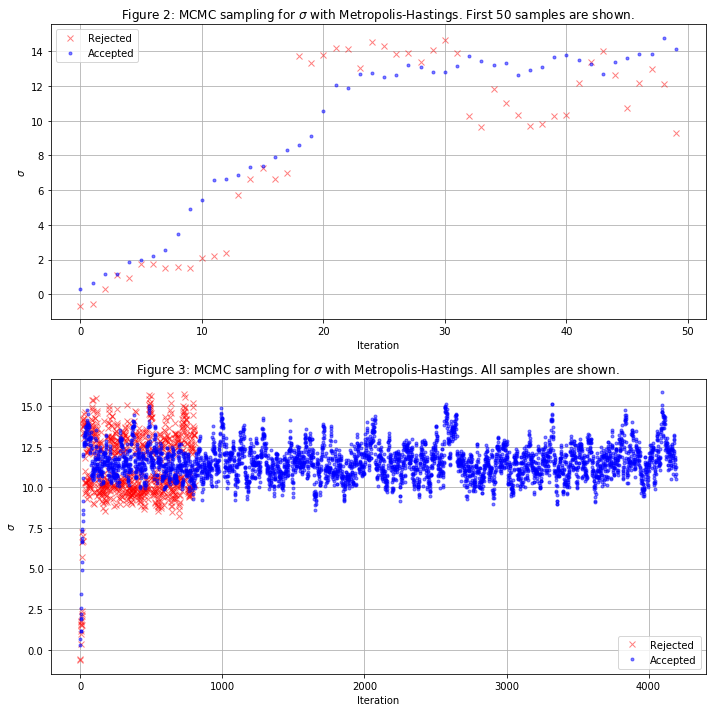

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

ax.plot( rejectedTeam1PTS[0:50,1], 'rx', label='Rejected',alpha=0.5)
ax.plot( acceptedTeam1PTS[0:50,1], 'b.', label='Accepted',alpha=0.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("$\sigma$")
ax.set_title("Figure 2: MCMC sampling for $\sigma$ with Metropolis-Hastings. First 50 samples are shown.")
ax.grid()
ax.legend()



ax2 = fig.add_subplot(2,1,2)
to_show=-acceptedTeam1PTS.shape[0]
ax2.plot( rejectedTeam1PTS[to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax2.plot( acceptedTeam1PTS[to_show:,1], 'b.', label='Accepted',alpha=0.5)
ax2.set_xlabel("Iteration")
ax2.set_ylabel("$\sigma$")
ax2.set_title("Figure 3: MCMC sampling for $\sigma$ with Metropolis-Hastings. All samples are shown.")
ax2.grid()
ax2.legend()



fig.tight_layout()
acceptedTeam1PTS.shape

In [14]:
#Function for 7 game series for LAL and MIL
def LALvsMILfinalsSeriesSim():
        team1win = 0
        team2win = 0
        
        for i in range(7):
            if team1win == 4:
                    print("LAL wins series!")
                    print("LAL:"+ str(team1win) + " MIL:" + str(team2win))
                    break
            elif team2win == 4:
                    print("MIL wins series!")
                    print("LAL:"+ str(team1win) + " MIL:" + str(team2win))
                    break
            win = LALvsMILfinalsGamesSim(LALdf, MILdf, 10000)
            if win == 1:
                team1win +=1 
            elif win == 2:
                team2win +=1

In [15]:
#Sim best of 7 series between LAL and MIL
LALvsMILfinalsSeriesSim()

MIL wins!
0.42855660475251633
0.5714433952474837
MIL wins!
0.43390982087708463
0.5660901791229154
MIL wins!
0.4359715199669797
0.5640284800330203
MIL wins!
0.42818624909260605
0.571813750907394
MIL wins series!
LAL:0 MIL:4


In [14]:
#Sd's using Metropolis-Hastings
print(LALdf.TeamPTS.std(), sigmaTeam1PTS)
print(MILdf.TeamPTS.std(), sigmaTeam2PTS)

#Series without Metropolis-Hastings
gamesSim(LALdf, MILdf, 10000)
gamesSim(LALdf, MILdf, 10000)
gamesSim(LALdf, MILdf, 10000)
gamesSim(LALdf, MILdf, 10000)

11.528366137768684 [11.62495657]
11.782442935930627 [11.98755843]
Team 2 wins!
0.4258743423088827
0.5741256576911173
Team 2 wins!
0.4385165233606133
0.5614834766393867
Team 2 wins!
0.43522833178005593
0.5647716682199441
Team 2 wins!
0.43038891187422423
0.5696110881257758
